# User Profiling & Segmentation Using Machine Learning

This project aims to analyze user behavior and demographic data to segment users into distinct profiles using unsupervised learning techniques. The goal is to help businesses personalize content and ads, improving engagement and conversion.
# Names:
Chapa Dayanita (chapadayanita@gmail.com)
Shreya Dutta (sdutta@student.gitam.edu)

## README.md file

🧠 User Profiling & Segmentation with Machine Learning
This project uses machine learning to group (or segment) users based on their demographics, behavior, and online activity. By identifying patterns in the data, businesses can better understand their users and personalize marketing, content, or services
________________________________________
📁 Dataset Overview
●	Total Users: 1,000
●	Features: 16 columns, including:

○	Demographics: Age, Gender, Income Level, Education Level
○	Behavior: Likes & Reactions, Device Usage, Time Spent Online
○	Engagement: Click-Through Rate (CTR), Conversion Rate, Ad Interaction Time
○	Interests: Top Interests, Followed Accounts

________________________________________
🚀 Project Goals
●	Segment users into meaningful groups using unsupervised learning.
●	Analyze behavioral patterns within each segment.
●	Provide actionable insights for business or marketing teams.
●	Visualize user clusters in 2D using PCA.

________________________________________
✅ Steps Followed
1.	Load and inspect the dataset

2.	Encode categorical variables (like Gender, Education Level)

3.	Drop irrelevant fields (like User ID)

4.	Normalize numerical features using StandardScaler

5.	Use the Elbow Method to choose the best number of clusters

6.	Apply KMeans clustering to segment users

7.	Use PCA to reduce dimensions and visualize segments

8.	Profile each segment to interpret behaviors

9.	Save the trained model and scaler for future predictions

10.	Predict user segments for new incoming data (optional)

________________________________________
📊 Tools & Libraries Used
●	Python (Jupyter Notebook)
●	pandas, numpy
●	matplotlib, seaborn
●	scikit-learn (StandardScaler, LabelEncoder, KMeans, PCA)
●	pickle (for saving models)

________________________________________
🧑‍💼 Segment Examples (Hypothetical)
●	Segment 0: Young, mobile-first users with high ad engagement
●	Segment 1: Older users, low CTR, primarily desktop users
●	Segment 2: Average-income users with high conversion rates

________________________________________
📦 Output Files
●	kmeans_model.pkl — saved KMeans clustering model
●	scaler.pkl — saved StandardScaler object
●	segmented_users.csv — (optional) users with their assigned segment

________________________________________
📌 Use Cases
●	Targeted marketing campaigns
●	Personalized recommendations
●	Customer lifetime value prediction
●	Behavioral segmentation in product analytics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("DATASET.csv")
print(df.shape)
df.head()


(1000, 16)


,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [ ]:
# Check missing values
df.isnull().sum()  
df.dropna(inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Use the correct column names from your dataset
label_cols = ['Gender', 'Education Level', 'Device Usage']  

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
df = df.drop(columns=['User ID'])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Apply StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_df)

# Optional: convert back to DataFrame for viewing
scaled_df = pd.DataFrame(df_scaled, columns=numeric_df.columns)
scaled_df.head()



,Gender,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec)
0,-0.988071,1.399908,0.226612,-0.433057,0.483553,1.362291,-1.432733,0.951027,0.600054,-1.290502
1,1.012073,0.691094,1.587521,0.870949,1.380683,-1.764920,1.529908,-0.159280,-0.202577,-0.455100
2,-0.988071,1.399908,-0.078279,-0.454203,0.483553,1.362291,0.492983,0.388846,1.577169,-0.221964
3,-0.988071,0.691094,1.475081,-0.700906,-1.310707,0.267767,-0.198299,-0.454425,0.390672,-0.513384
4,-0.988071,1.399908,0.652403,0.842754,0.483553,-0.592216,-0.395809,0.698045,-0.970311,0.147167


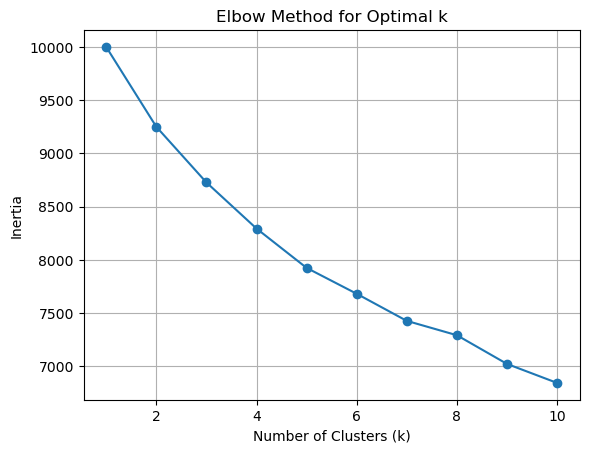

In [ ]:
# Step 4: Elbow Method(We use the elbow method to identify the optimal number of clusters (k) for KMeans clustering. This is done by plotting the inertia for different values of k and identifying the "elbow point" where inertia starts decreasing more slowly.)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()





In [ ]:
# Step 5: Apply KMeans Clustering
k = 4  # Replace with optimal k from elbow curve
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to original DataFrame
df['Segment'] = clusters



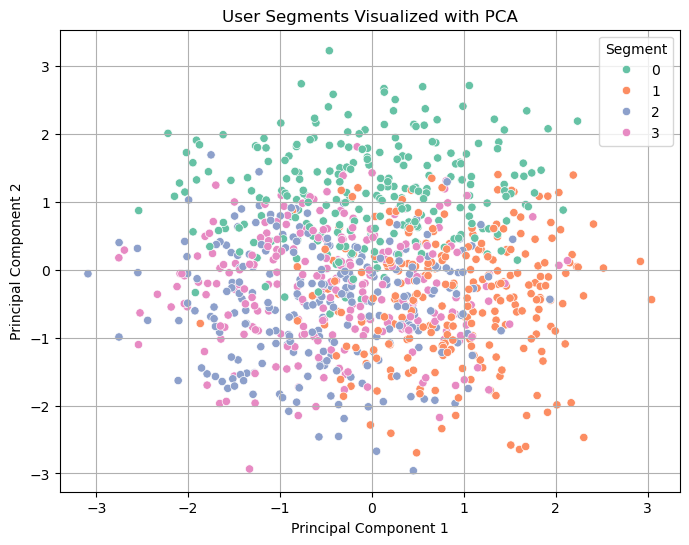

In [ ]:
# Visualize User Segments Using PCA
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Add PCA components to DataFrame
df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Segment', palette='Set2')
plt.title('User Segments Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [ ]:
# Segment-wise average values
segment_profiles = df.groupby('Segment').mean(numeric_only=True)
print(segment_profiles)

# Count of users per segment
print(df['Segment'].value_counts())





            User ID  Likes and Reactions  Followed Accounts  \
Segment                                                       
0        526.722892          2871.503012         134.870482   
1        468.438312          3821.961039         397.110390   
2        503.747222          7962.725000         234.308333   

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Segment                                                                     
0                               2.759940                         4.621084   
1                               2.838961                         5.039935   
2                               2.685556                         4.208611   

         Click-Through Rates (CTR)  Conversion Rates  \
Segment                                                
0                         0.127849          0.051211   
1                         0.120779          0.051987   
2                         0.126908          0.046642   

         Ad Inter

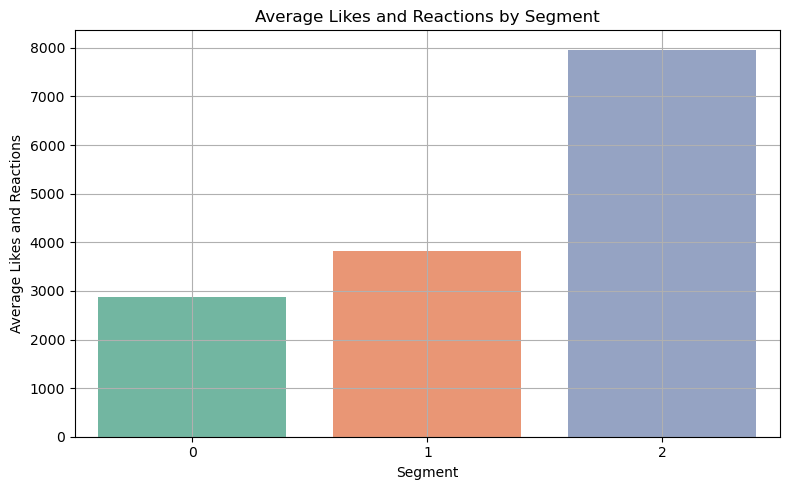

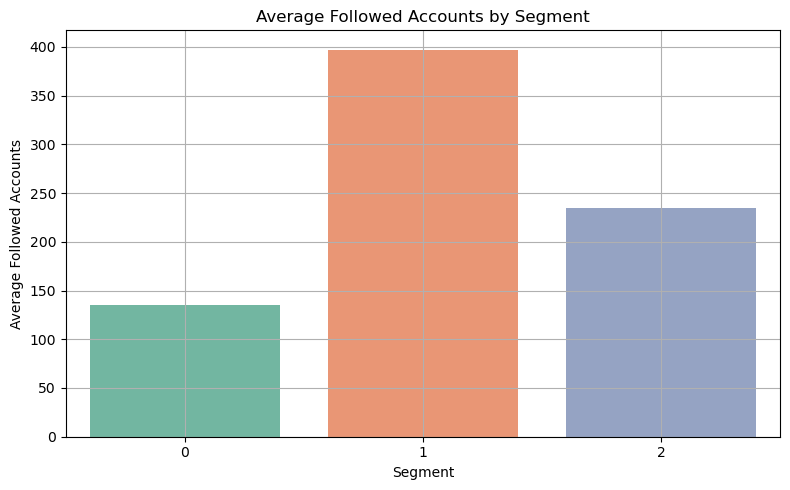

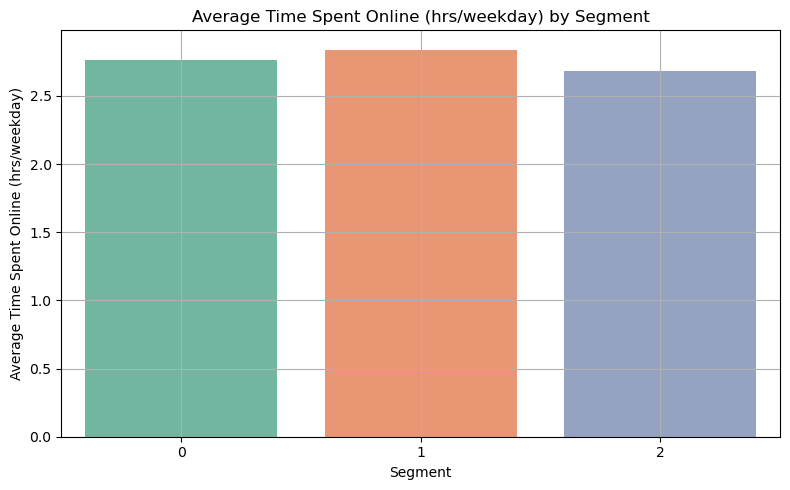

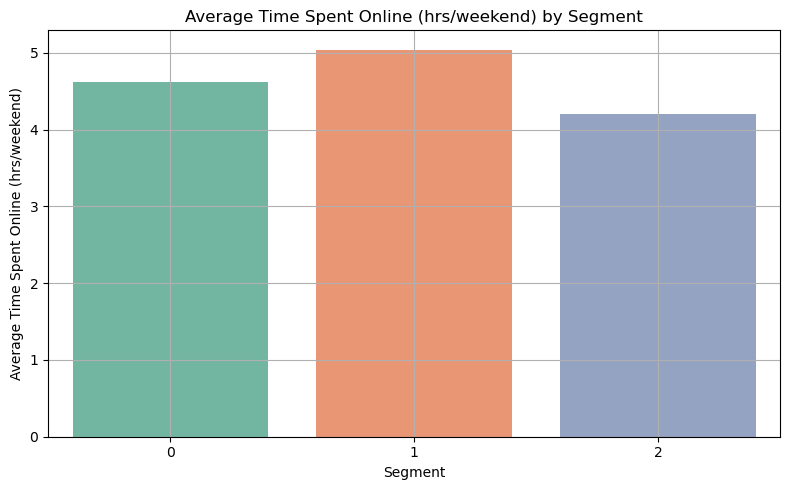

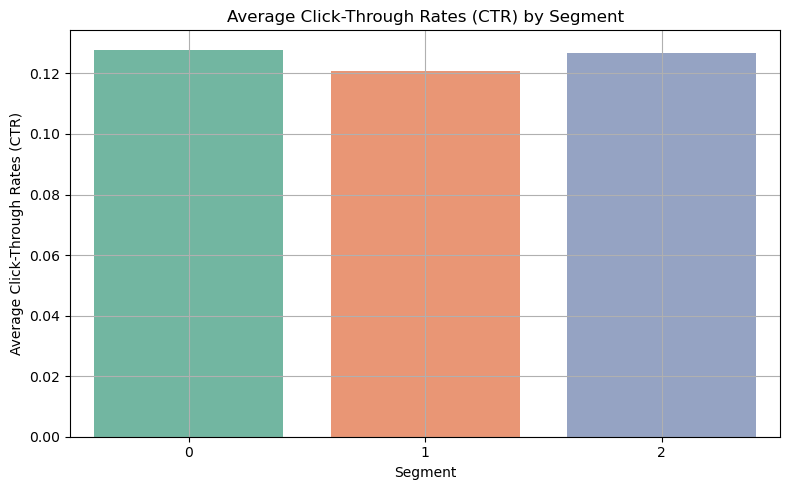

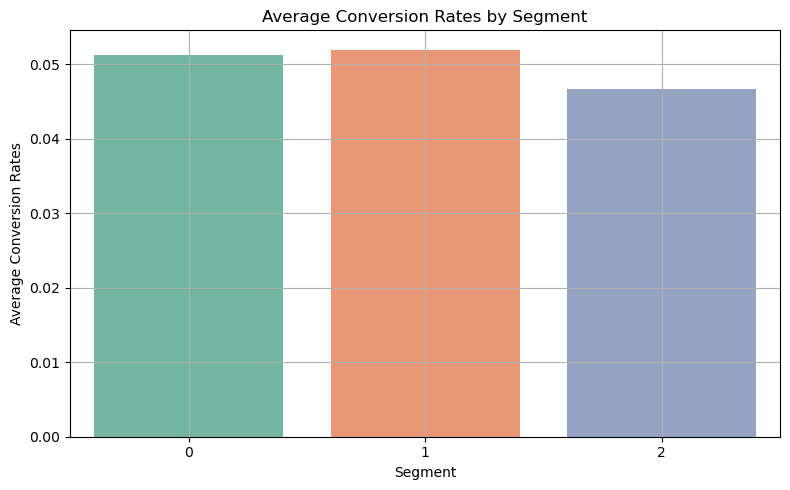

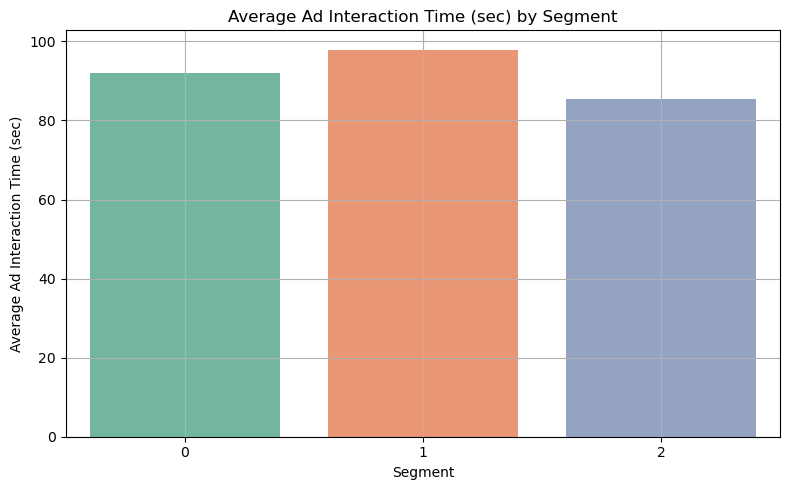

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = [
    'Likes and Reactions',
    'Followed Accounts',
    'Time Spent Online (hrs/weekday)',
    'Time Spent Online (hrs/weekend)',
    'Click-Through Rates (CTR)',
    'Conversion Rates',
    'Ad Interaction Time (sec)'
]

for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='Segment', y=feature, estimator='mean', errorbar=None, hue='Segment', palette='Set2', legend=False)
    plt.title(f'Average {feature} by Segment')
    plt.xlabel("Segment")
    plt.ylabel(f"Average {feature}")
    plt.tight_layout()
    plt.grid(True)
    plt.show()
